In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Dell\Desktop\cognorise infotech\Unemployment in india\Unemployment_Rate_upto_11_2020.csv")

In [2]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


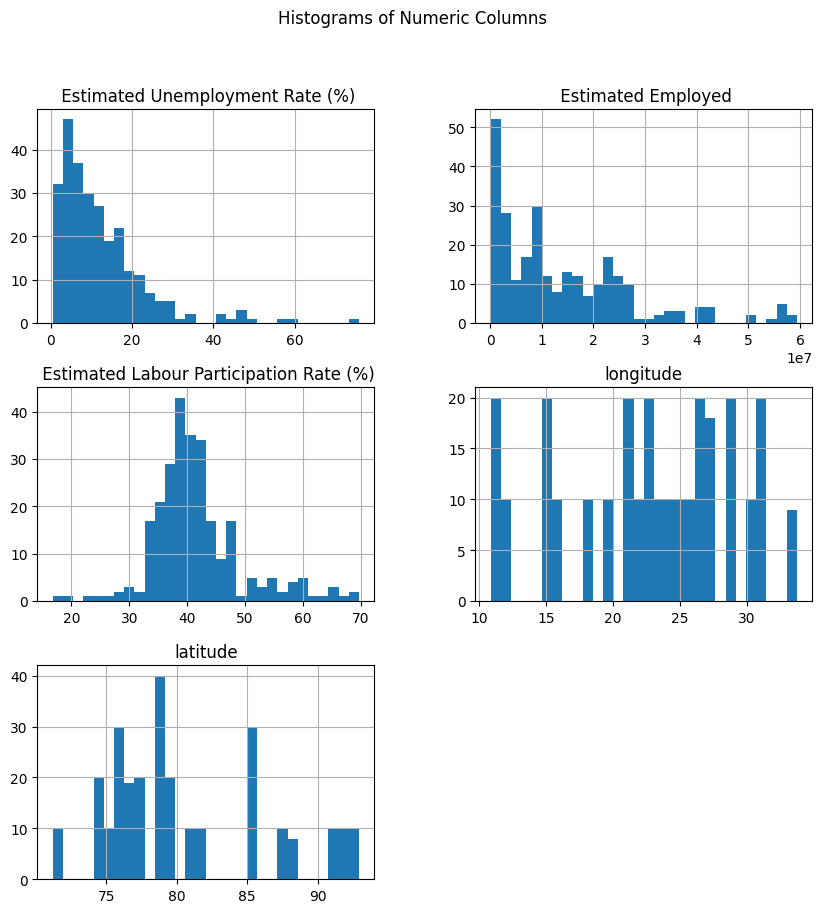

In [6]:
import matplotlib.pyplot as plt
numeric_columns = [' Estimated Unemployment Rate (%)', ' Estimated Employed', 
                   ' Estimated Labour Participation Rate (%)', 'longitude', 'latitude']

# Histograms
df[numeric_columns].hist(bins=30, figsize=(10, 10))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

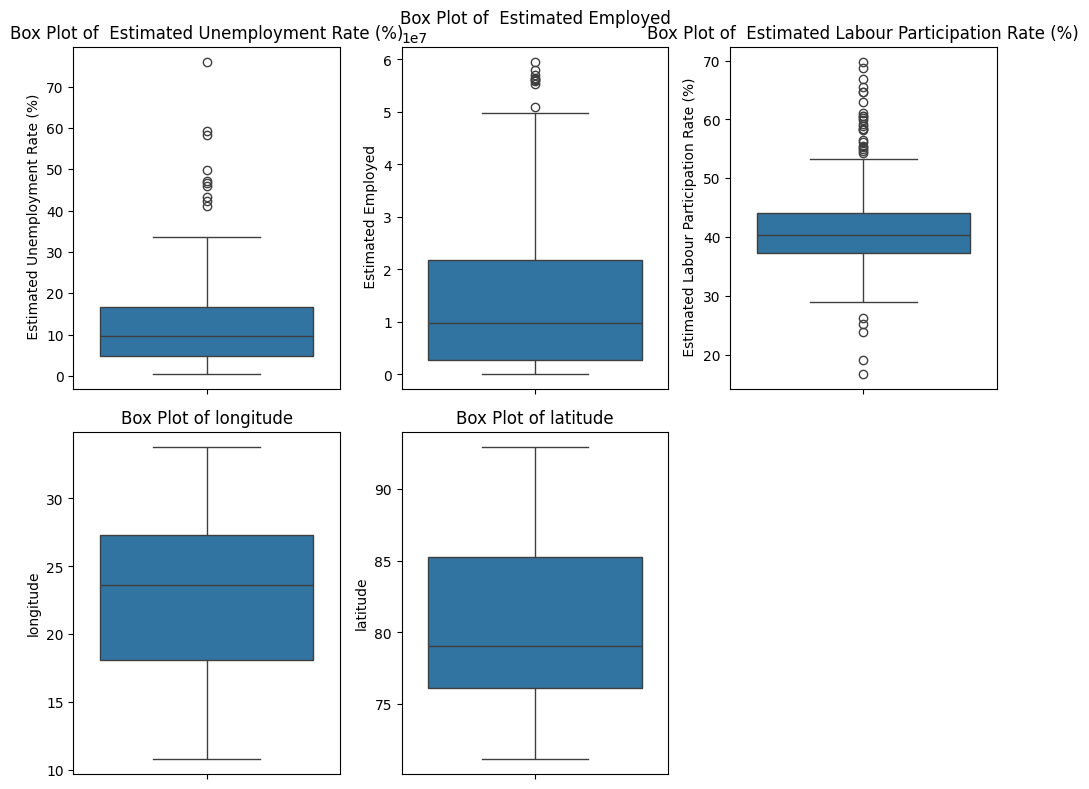

In [7]:
import seaborn as sns

# Box plots
plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


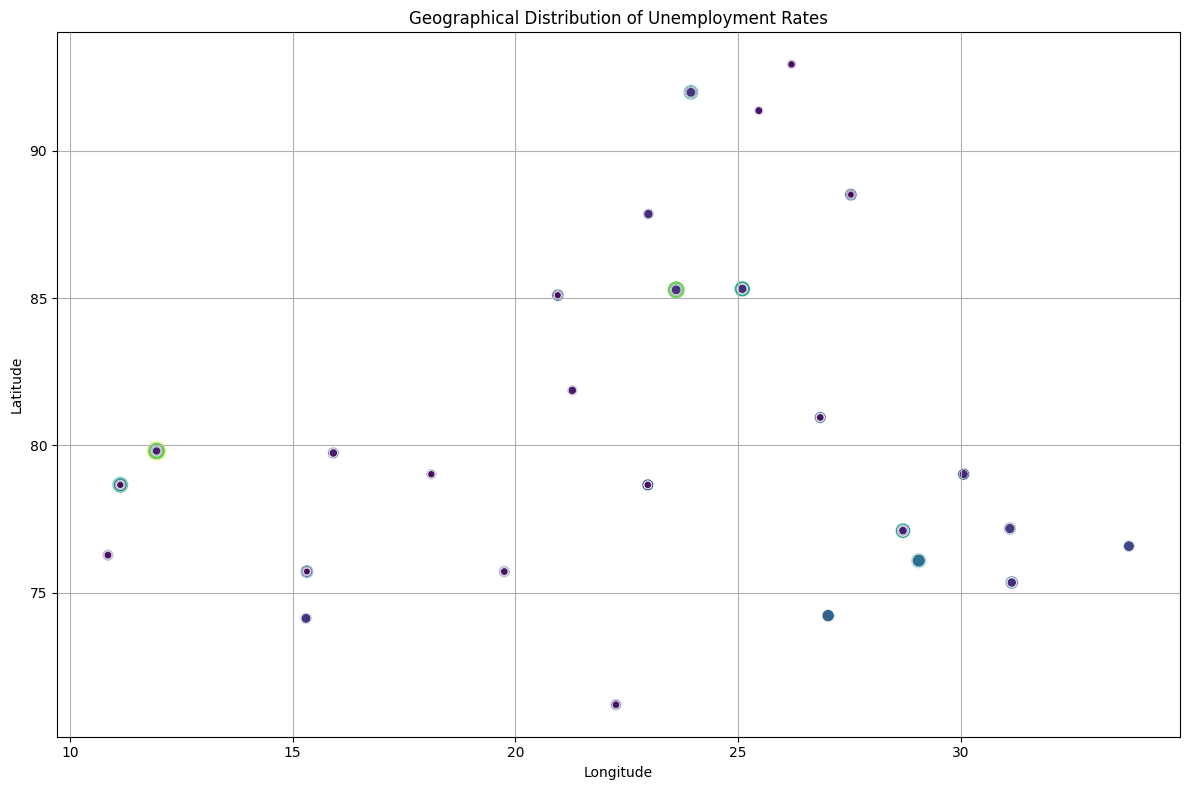

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', size=' Estimated Unemployment Rate (%)', hue=' Estimated Unemployment Rate (%)', data=df, palette='viridis', legend=None, sizes=(20, 200))
plt.title('Geographical Distribution of Unemployment Rates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

C:\Users\Dell\AppData\Local\Temp\ipykernel_8792\754358122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=regional_summary, palette='viridis')


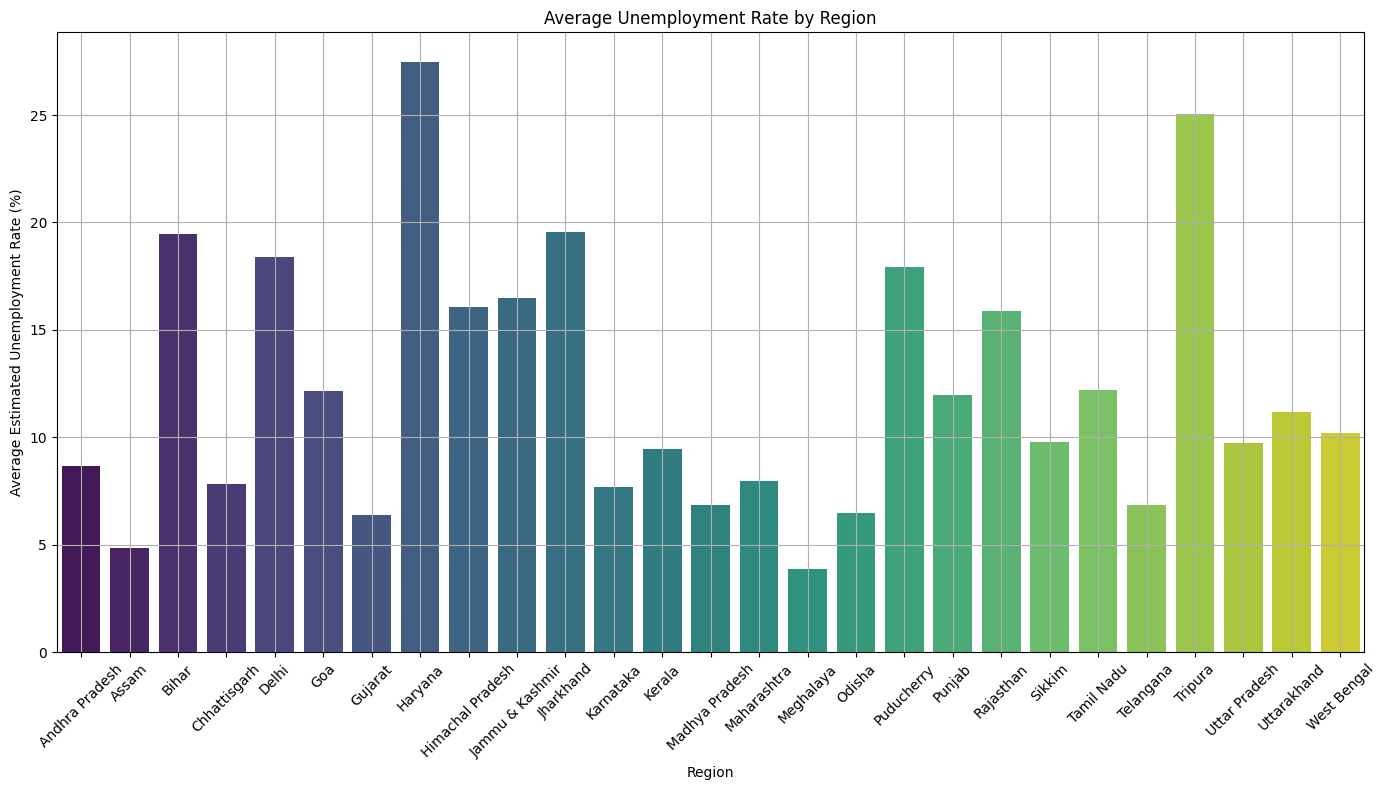

In [13]:
regional_summary = df.groupby('Region').agg({
    ' Estimated Unemployment Rate (%)': 'mean',
    ' Estimated Employed': 'sum',
    ' Estimated Labour Participation Rate (%)': 'mean'
}).reset_index()

# Plot the average unemployment rates by region
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=regional_summary, palette='viridis')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_8792\916038356.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y=' Estimated Employed', data=regional_summary, palette='viridis')


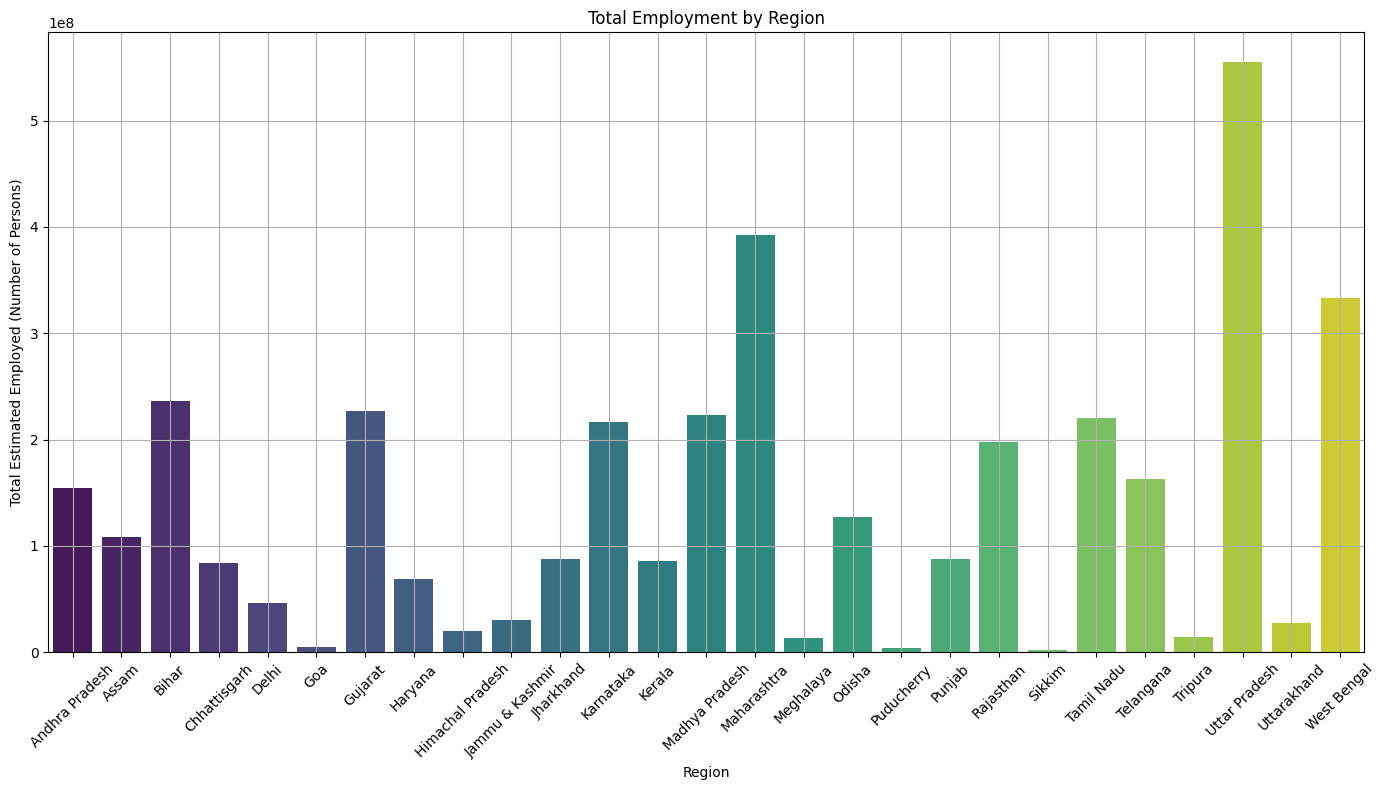

In [12]:
# Plot the total employment by region
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y=' Estimated Employed', data=regional_summary, palette='viridis')
plt.title('Total Employment by Region')
plt.xlabel('Region')
plt.ylabel('Total Estimated Employed (Number of Persons)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_8792\2839505093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y=' Estimated Labour Participation Rate (%)', data=regional_summary, palette='viridis')


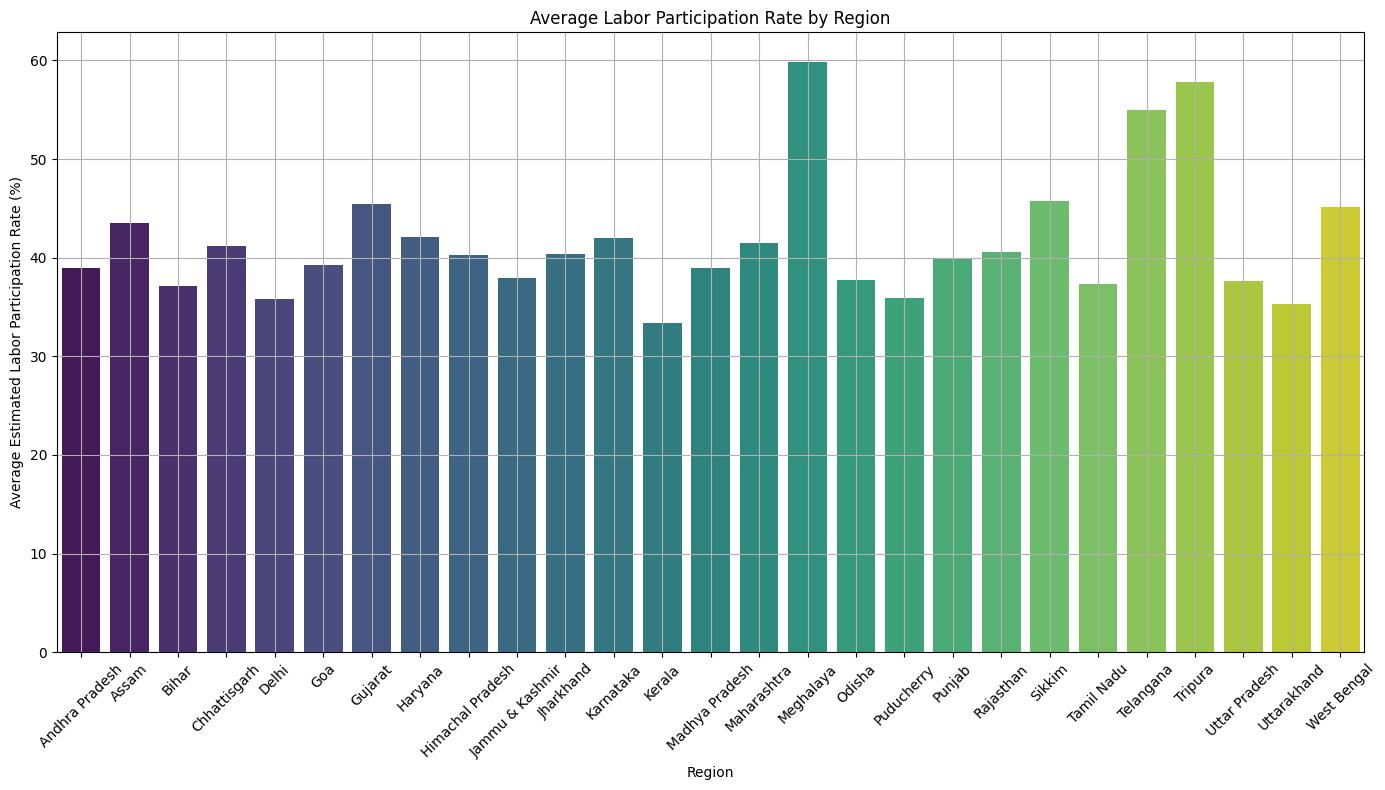

In [11]:
# Plot the average labor rate by region
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y=' Estimated Labour Participation Rate (%)', data=regional_summary, palette='viridis')
plt.title('Average Labor Participation Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Estimated Labor Participation Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

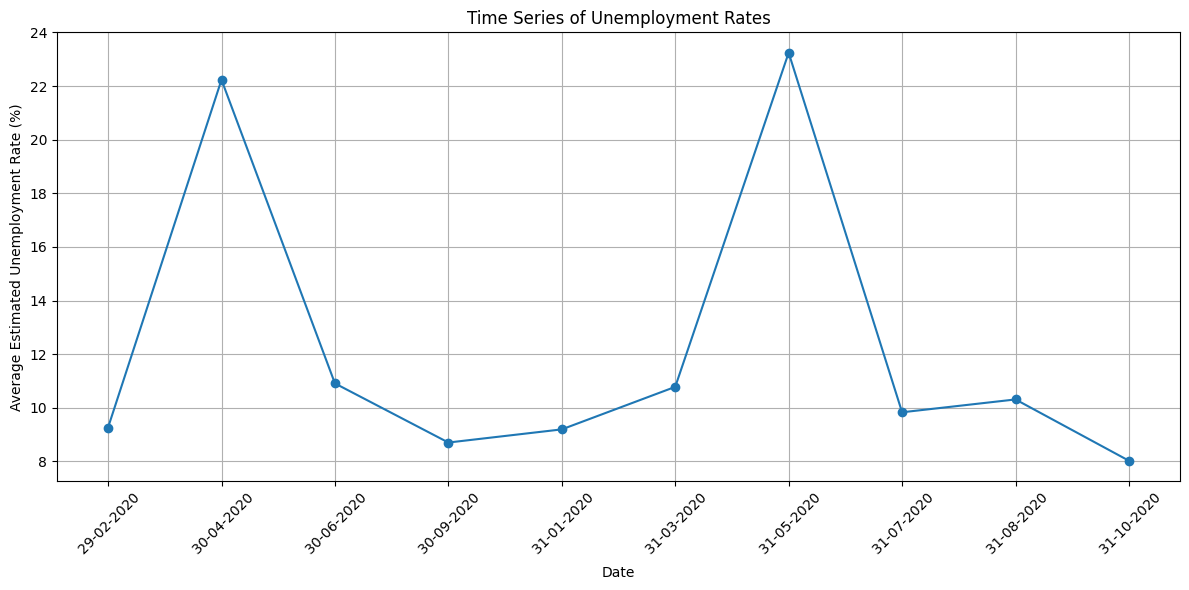

In [16]:
time_series_summary = df.groupby(' Date').agg({
    ' Estimated Unemployment Rate (%)': 'mean',
    ' Estimated Employed': 'sum',
    ' Estimated Labour Participation Rate (%)': 'mean'
}).reset_index()

# Plot the time series of unemployment rates
plt.figure(figsize=(12, 6))
plt.plot(time_series_summary[' Date'], time_series_summary[' Estimated Unemployment Rate (%)'], marker='o', linestyle='-')
plt.title('Time Series of Unemployment Rates')
plt.xlabel('Date')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




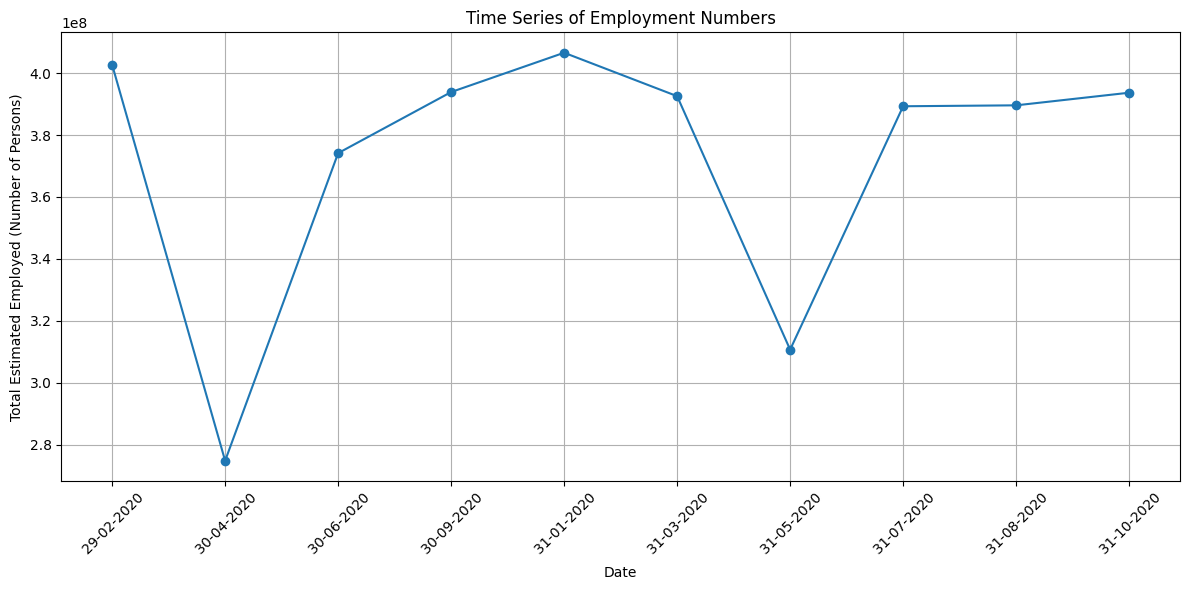

In [17]:
# Plot the time series of employment numbers
plt.figure(figsize=(12, 6))
plt.plot(time_series_summary[' Date'], time_series_summary[' Estimated Employed'], marker='o', linestyle='-')
plt.title('Time Series of Employment Numbers')
plt.xlabel('Date')
plt.ylabel('Total Estimated Employed (Number of Persons)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


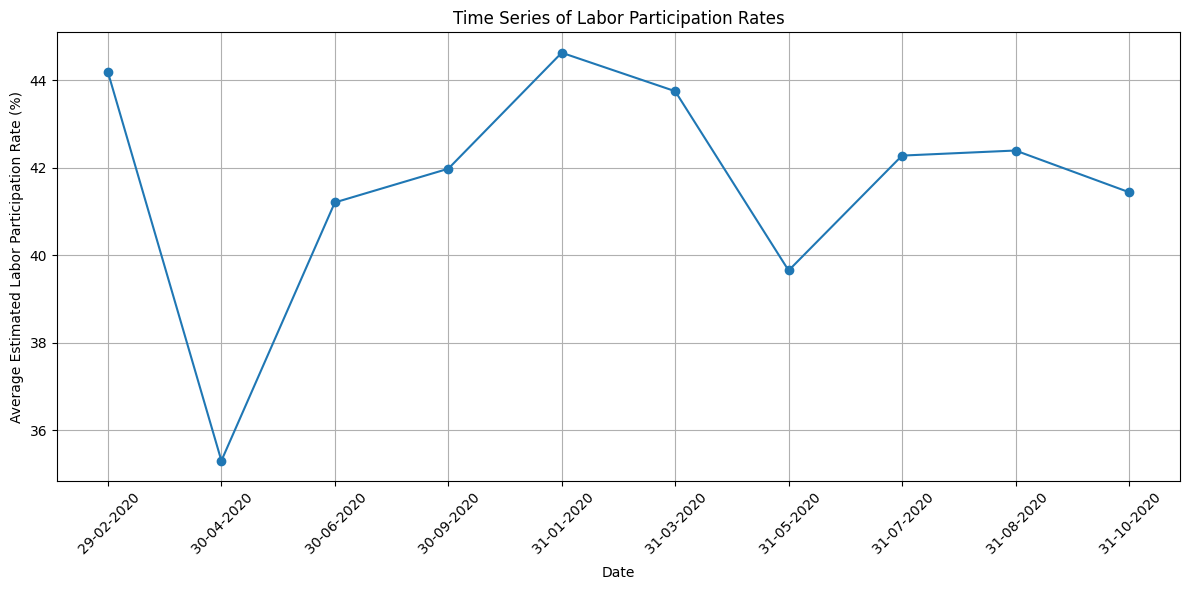

In [18]:
# Plot the time series of labor participation rates
plt.figure(figsize=(12, 6))
plt.plot(time_series_summary[' Date'], time_series_summary[' Estimated Labour Participation Rate (%)'], marker='o', linestyle='-')
plt.title('Time Series of Labor Participation Rates')
plt.xlabel('Date')
plt.ylabel('Average Estimated Labor Participation Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

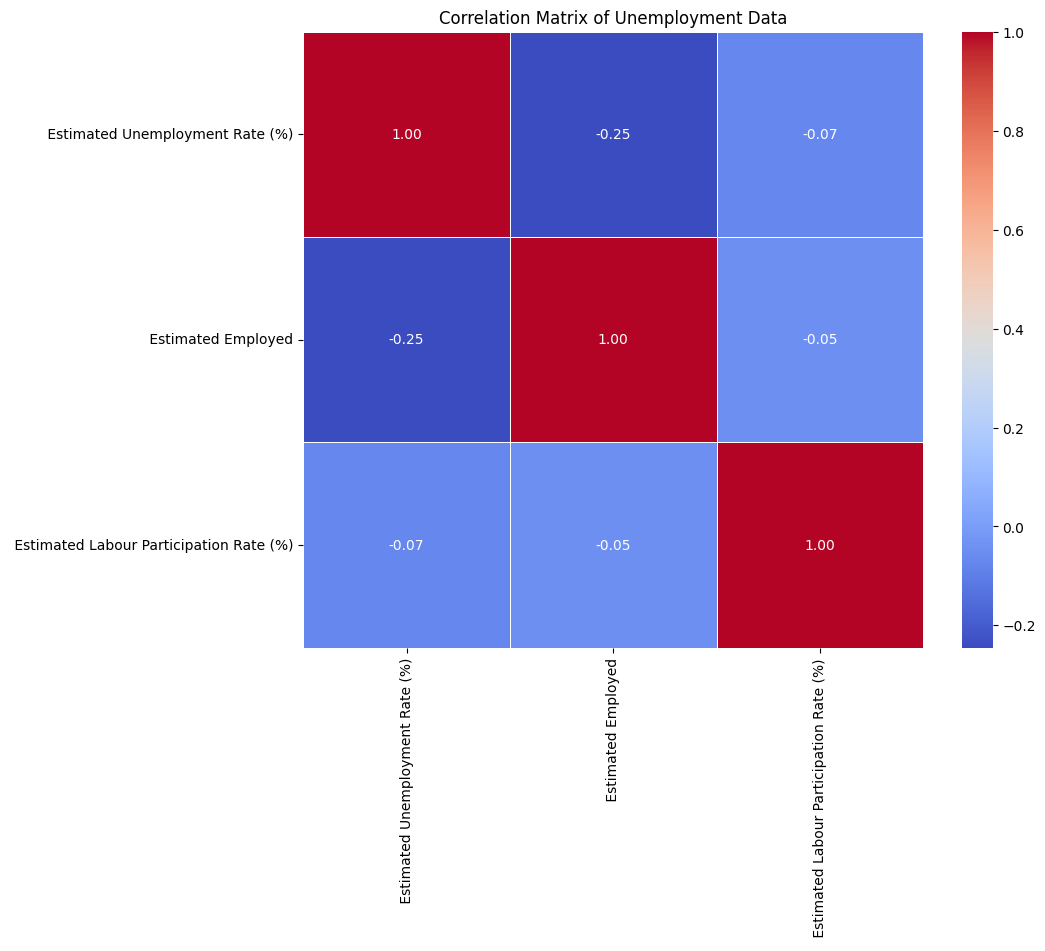

In [19]:
numerical_columns = [' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Unemployment Data')
plt.show()

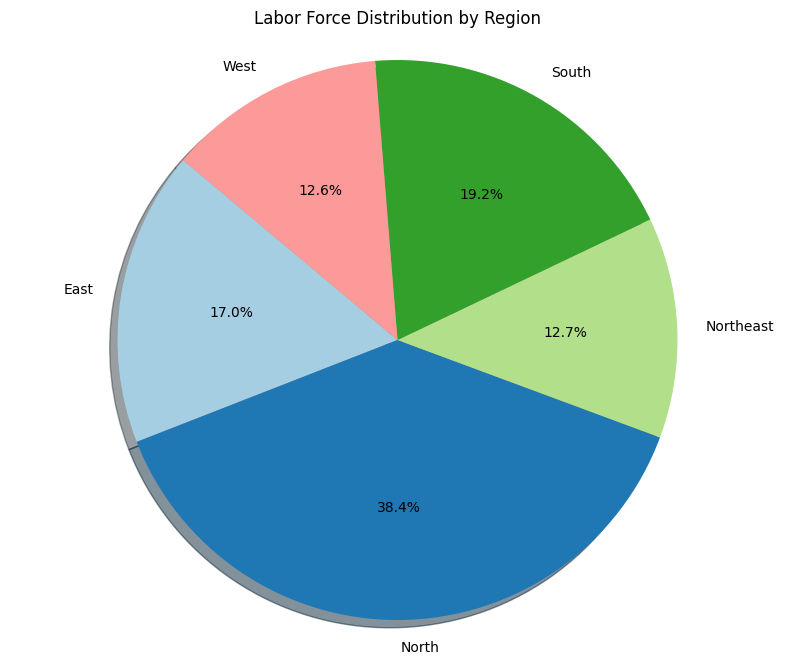

In [22]:

df['estimated_labor_force'] = df[' Estimated Employed'] / (df[' Estimated Labour Participation Rate (%)'] / 100)

# Group by region and sum the estimated labor force
regional_labor_force = df.groupby('Region.1')['estimated_labor_force'].sum().reset_index()

# Create the pie chart
labels = regional_labor_force['Region.1']
sizes = regional_labor_force['estimated_labor_force']
colors = plt.cm.Paired(range(len(labels)))  # Use a colormap for better visualization

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Labor Force Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()